In [1]:
#important libraries
import numpy as np 
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

df1 = pd.read_csv("datasets/winequality-red.csv", delimiter=";")

df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [2]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [3]:
df1.quality.value_counts(bins=10)

(4.5, 5.0]      681
(5.5, 6.0]      638
(6.5, 7.0]      199
(3.5, 4.0]       53
(7.5, 8.0]       18
(2.994, 3.5]     10
(4.0, 4.5]        0
(5.0, 5.5]        0
(6.0, 6.5]        0
(7.0, 7.5]        0
Name: quality, dtype: int64

In [4]:
from pycaret.classification import *

In [6]:
session_1 = setup(df1, target = 'quality', session_id=123, log_experiment=False, experiment_name='wine_q1')

,Description,Value
0,session_id,123
1,Target,quality
2,Target Type,Multiclass
3,Label Encoded,None
4,Original Data,"(1599, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [7]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [9]:
#creating random forest model
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6875,0.8699,0.3287,0.6603,0.6681,0.4954,0.4998
1,0.6786,0.0000,0.3843,0.6462,0.6548,0.4744,0.4800
2,0.7321,0.0000,0.5416,0.7086,0.7190,0.5727,0.5747
3,0.6786,0.8581,0.3329,0.6423,0.6565,0.4768,0.4804
4,0.6696,0.8336,0.2967,0.6271,0.6388,0.4568,0.4663
5,0.7500,0.8702,0.3791,0.7276,0.7330,0.5962,0.6022
6,0.7500,0.8629,0.5335,0.7199,0.7310,0.5958,0.5995
7,0.6518,0.8319,0.2808,0.6022,0.6212,0.4301,0.4357
8,0.6696,0.8423,0.3130,0.6260,0.6458,0.4647,0.4673


In [10]:
#creating Extra Trees Classifier
et = create_model('et')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7321,0.8892,0.3468,0.7054,0.7096,0.5675,0.5766
1,0.7054,0.0000,0.3794,0.6864,0.6736,0.5103,0.5215
2,0.7411,0.0000,0.5460,0.7369,0.7338,0.5857,0.5880
3,0.7143,0.8581,0.3394,0.6789,0.6888,0.5314,0.5371
4,0.7054,0.8503,0.3112,0.6590,0.6723,0.5155,0.5263
5,0.7500,0.8801,0.3789,0.7238,0.7325,0.5959,0.5999
6,0.7500,0.8838,0.5170,0.7153,0.7272,0.5943,0.5994
7,0.6696,0.8495,0.2962,0.6263,0.6382,0.4565,0.4626
8,0.6786,0.8564,0.3250,0.6432,0.6555,0.4752,0.4797


In [11]:
#light GBM Model
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7054,0.8554,0.3442,0.6755,0.6850,0.5280,0.5337
1,0.6607,0.0000,0.3757,0.6308,0.6412,0.4474,0.4512
2,0.7321,0.0000,0.5317,0.7163,0.7167,0.5650,0.5693
3,0.6786,0.8448,0.3165,0.6508,0.6585,0.4785,0.4821
4,0.6964,0.8391,0.3157,0.6582,0.6686,0.5032,0.5095
5,0.6964,0.8570,0.3487,0.6605,0.6760,0.5082,0.5111
6,0.6964,0.8513,0.5033,0.6632,0.6786,0.5130,0.5149
7,0.6161,0.8020,0.2745,0.5722,0.5891,0.3706,0.3750
8,0.6518,0.8141,0.3141,0.6209,0.6332,0.4368,0.4393


In [12]:
#Hyper params tuning via tune_model
tuned_et = tune_model(et)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6339,0.7983,0.2821,0.6366,0.5993,0.3868,0.3963
1,0.5804,0.0000,0.2826,0.4881,0.5298,0.2938,0.3030
2,0.5982,0.0000,0.3410,0.6004,0.5773,0.3326,0.3387
3,0.5893,0.7775,0.2468,0.5472,0.5438,0.3086,0.3175
4,0.6518,0.8061,0.2645,0.5438,0.5905,0.4100,0.4285
5,0.6250,0.8112,0.2861,0.5858,0.5966,0.3818,0.3871
6,0.6607,0.8127,0.3009,0.6379,0.6308,0.4364,0.4443
7,0.6071,0.7629,0.2709,0.5782,0.5779,0.3479,0.3548
8,0.6071,0.7741,0.2708,0.5613,0.5772,0.3525,0.3572


In [13]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight={},
                     criterion='entropy', max_depth=5, max_features=1.0,
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0002, min_impurity_split=None,
                     min_samples_leaf=5, min_samples_split=10,
                     min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

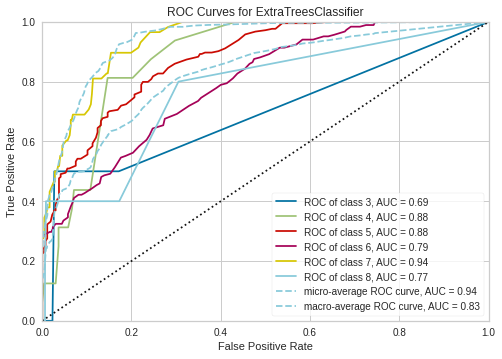

In [14]:
plot_model(et)

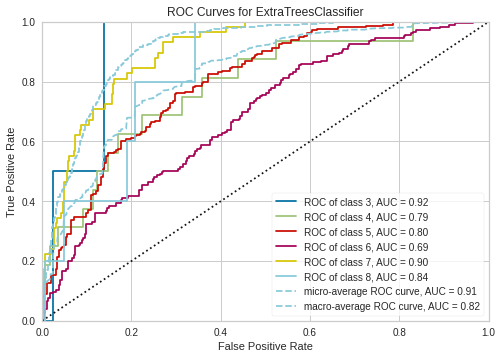

In [15]:
plot_model(tuned_et)